# TP multi-class classification

Diane Lingrand (diane.lingrand@univ-cotedazur.fr)

University Côte d'Azur - 2024

## necessary imports

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

from sklearn.metrics import ConfusionMatrixDisplay, f1_score, confusion_matrix
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.utils

In [2]:
from pandas import pandas

In [3]:
# reading the dataset
from tensorflow.keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 365s 2us/step


In [4]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)


In [5]:
fine_label = [
'apple', # id 0
'aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock',
'cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','computer_keyboard','lamp','lawn_mower','leopard',
'lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy',
'porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper',
'table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm',
]

In [6]:
mapping = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

In [7]:
# classes to sup classes
fine_to_coarse = {0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7, 8: 18,
 9: 3, 10: 3, 11: 14, 12: 9, 13: 18, 14: 7, 15: 11, 16: 3,
 17: 9, 18: 7, 19: 11, 20: 6, 21: 11, 22: 5, 23: 10, 24: 7, 25: 6,
 26: 13, 27: 15, 28: 3, 29: 15, 30: 0, 31: 11, 32: 1, 33: 10, 34: 12,
 35: 14, 36: 16, 37: 9, 38: 11, 39: 5, 40: 5, 41: 19, 42: 8, 43: 8, 44: 15,
 45: 13, 46: 14, 47: 17, 48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
 56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12, 64: 12, 65: 16,
 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10, 72: 0, 73: 1, 74: 16, 75: 12, 76: 9,
 77: 13, 78: 15, 79: 13, 80: 16, 81: 19, 82: 2, 83: 4, 84: 6, 85: 19, 86: 5,
 87: 5, 88: 8, 89: 19, 90: 18, 91: 1, 92: 2, 93: 15, 94: 6, 95: 0,
 96: 17, 97: 8, 98: 14, 99: 13}

In [8]:
coarse_label = ['aquatic mammals',
'fish', 'flowers','food containers','fruit and vegetables','household electrical device','household furniture','insects','large carnivores','large man-made outdoor things','large natural outdoor scenes',
'large omnivores and herbivores','medium-sized mammals','non-insect invertebrates','people','reptiles','small mammals','trees','vehicles 1','vehicles 2']

TypeError: unhashable type: 'numpy.ndarray'

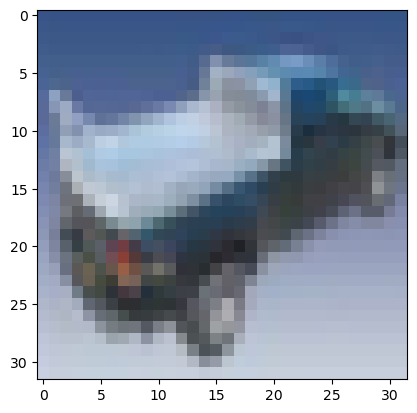

In [9]:
# display a random image from the train dataset (re-run the cell in order to change the image)
import matplotlib.pyplot as plt
i = random.randint(0,len(x_train)-1)
plt.imshow(x_train[i])
print(y_train[i], fine_to_coarse[y_train[i]])
plt.title(fine_label[y_train[i]]+' : '+coarse_label[fine_to_coarse[y_train[i]]])
plt.show()

Extract a subset of cifar100 containing all classes from 3 supclasses:

In [ ]:
# selected sup classes
filterSupCl = [ # up to you to choose 3 super classes ]



In [ ]:
# build the list of corresponding classes to these selected sup classes
filterCl=[]
# to be continued

You will probably need arrays for mapping classes, superclasses, indices ...


In [ ]:
# your work

Using filters on indices, build the train and test parts for data and labels. Don't forget to divide pixels values by 255 and save the values as float.

In [2]:
# your work

# 1. superclasses classification
In this part, we will compare the multiclass classification of the 3 superclasses with the 15 classes classification for 3 superclasses.

### 1.1 Classification of the selected superclasses

First, prepare yTrainSup and yTestSup.

In [ ]:
# your work


Build a simple neural network for the classification:

In [ ]:
.
#Let's build a simple neural network using the keras sequential method
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(nbSupClasses, activation='softmax'))

Compile, learn and display evaluation metrics.

### classification in classes and metrics on the 3 superclasses

Build a similar model (except the last layer, of course), using the classes corresponding to your 3 superclasses. It could be around 15 classes. As usual, train and display metrics.

In [4]:
# your work

Compute now the metrics by considering only the 3 superclasses.

In [ ]:
# your work

# 2. Local classifiers (or top-down)
  In this part, the goal is the class classification using a classifier per sup-class. If you choose 3 sup-classes, you need to build 3 classifiers + 1 for the root.

# 3. Hierarchical loss: HXE (from *Making better Mistakes*, CVPR 2000)
In this part, you will implement some of the ideas of the paper [Making better Mistakes, CVPR 2000](https://https://openaccess.thecvf.com/content_CVPR_2020/papers/Bertinetto_Making_Better_Mistakes_Leveraging_Class_Hierarchies_With_Deep_Networks_CVPR_2020_paper.pdf)

## 3.1 Implement the HXE
using a similar architecture as in 1.1 or 1.2

## 3.2 Add specific metrics for HMC
as for example 'average hierarchical distance of top-k'.

## 3.3 Add the soft label (from Making better Mistakes, CVPR 2000)